In [7]:
import pandas as pd

In [8]:
file = './data/KBO_2019_player_gamestats.csv'

raw = pd.read_csv(file, encoding ='cp949')

In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15311 entries, 0 to 15310
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   팀       15311 non-null  object 
 1   이름      15311 non-null  object 
 2   생일      15311 non-null  object 
 3   일자      15311 non-null  object 
 4   상대      15311 non-null  object 
 5   결과      15311 non-null  object 
 6   타순      15311 non-null  int64  
 7   P       15311 non-null  object 
 8   선발      15311 non-null  int64  
 9   타수      15311 non-null  int64  
 10  득점      15311 non-null  int64  
 11  안타      15311 non-null  int64  
 12  2타      15311 non-null  int64  
 13  3타      15311 non-null  int64  
 14  홈런      15311 non-null  int64  
 15  루타      15311 non-null  int64  
 16  타점      15311 non-null  int64  
 17  도루      15311 non-null  int64  
 18  도실      15311 non-null  int64  
 19  볼넷      15311 non-null  int64  
 20  사구      15311 non-null  int64  
 21  고4      15311 non-null  int64  
 22

In [8]:
raw.head()

,팀,이름,생일,일자,상대,결과,타순,P,선발,타수,...,희타,희비,타율,출루,장타,OPS,투구,avLI,RE24,WPA
0,두산,페르난데스,1988-04-27,03-23,한화,W 5:4,6,DH,1,4,...,0,0,0.500,0.500,0.750,1.250,19,1.98,1.65,0.429
1,두산,페르난데스,1988-04-27,03-24,한화,L 1:11,6,DH,1,2,...,0,0,0.333,0.333,0.500,0.833,4,0.77,-0.36,-0.038
2,두산,페르난데스,1988-04-27,03-26,키움,W 7:2,2,DH,1,2,...,0,0,0.250,0.400,0.375,0.775,16,1.56,0.98,0.146
3,두산,페르난데스,1988-04-27,03-27,키움,W 3:2,2,DH,1,4,...,0,0,0.417,0.500,0.500,1.000,11,1.53,1.29,0.189
4,두산,페르난데스,1988-04-27,03-28,키움,L 4:5,2,DH,1,3,...,0,0,0.333,0.474,0.400,0.874,23,2.04,-0.30,-0.166


In [9]:
# 필요한 컬럼만 선택

raw.columns

columns_select= ['팀', '이름','생일', '일자','상대', '타수','사구','안타','희비','볼넷','홈런', '루타','타점']
data = raw[columns_select]
data.head()

,팀,이름,생일,일자,상대,타수,사구,안타,희비,볼넷,홈런,루타,타점
0,두산,페르난데스,1988-04-27,03-23,한화,4,0,2,0,0,0,3,3
1,두산,페르난데스,1988-04-27,03-24,한화,2,0,0,0,0,0,0,0
2,두산,페르난데스,1988-04-27,03-26,키움,2,0,0,0,2,0,0,1
3,두산,페르난데스,1988-04-27,03-27,키움,4,0,3,0,0,0,3,1
4,두산,페르난데스,1988-04-27,03-28,키움,3,0,0,0,2,0,0,0


In [10]:
# 피벗테이블로 선수별 주요 기록 정리

data_player = data.pivot_table(index = ['팀','이름','생일'],
                values = ['타수','안타','홈런','루타','타점','볼넷','사구','희비'],
                aggfunc = 'sum')

data_player

루타  볼넷  사구   안타   타수  타점  홈런  희비
팀   이름  생일                                           
KIA 고영창 1989-02-24    0   0   0    0    0   0   0   0
    김선빈 1989-12-18  146  43   1  115  394  40   3   4
    김세현 1987-08-07    0   0   0    0    0   0   0   0
    김주찬 1981-03-25  126  17   5  101  337  32   3   3
    나지완 1985-05-19   47  19   3   24  129  17   6   2
...                 ...  ..  ..  ...  ...  ..  ..  ..
한화  최윤석 1987-03-28    3   3   0    3   12   1   0   0
    최재훈 1989-08-27  135  56  14  108  373  31   3   4
    최진행 1985-08-17   51   9   2   27  117  19   6   1
    하주석 1994-02-25    7   0   0    5   19   2   0   0
    호잉  1989-05-18  219  38   5  135  476  73  18   5

[285 rows x 8 columns]

<AxesSubplot:>

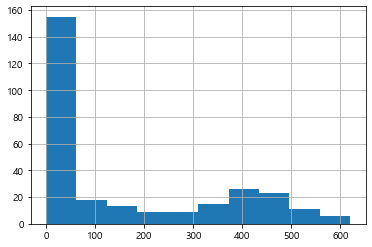

In [11]:
# 타수가 0이거나 너무 적은 데이터는 제외시키기
# 어느 정도가 적은지 판단 하기 위해 타수 데이터 분포 살펴보기

data_player['타수'].hist()

In [12]:
# 타수가 50보다 큰 선수만 선택

con = data_player['타수']>50

data_player = data_player[con].reset_index()       # 인덱스 초기화 
data_player

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,4
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,3
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,2
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,0
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2
...,...,...,...,...,...,...,...,...,...,...,...
132,한화,정은원,2000-01-17,211,48,0,148,564,57,8,6
133,한화,지성준,1994-04-10,38,5,0,26,104,11,2,0
134,한화,최재훈,1989-08-27,135,56,14,108,373,31,3,4
135,한화,최진행,1985-08-17,51,9,2,27,117,19,6,1


In [13]:
# 타율/출루율/장타율/OPS를 계산하는 함수 만들기
# 데이터 프레임을 입력하면, 해당 데이터 프레임에서 인덱스별 실작을 계산해서 반환
# 타율 : 타격에 성공해서 진루하는 비율      (안타/타수)
# 출루율 : 살아서 진루하는 비율             (안타+볼넷+몸에맞는볼/타수+ㅂ볼넷+몸에맞는볼+희생플라이)
# 장타율 : 타율에 진루한 베이스 가중치 추가 (루타/타수)
# OPS : 출루율+장타율                       (출루율+장타율)

def cal_hit(df):
    
    df['타율'] = df['안타'] / df['타수']
    df['출루율'] = (df['안타'] + df['볼넷']+df['사구'])/(df['타수'] + df['볼넷']+df['사구']+df['희비'])
    df['장타율'] = df['루타'] / df['타수']
    df['OPS'] = df['출루율'] / df['장타율']
    
    return df
    
    
    

In [14]:
# 함수 적용

player_stat = cal_hit(data_player)
player_stat.head()

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,4,0.291878,0.359729,0.370558,0.970774
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,3,0.299703,0.339779,0.373887,0.908774
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,2,0.186047,0.300654,0.364341,0.825198
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,0,0.253333,0.312883,0.320000,0.977761
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2,0.259921,0.300373,0.317460,0.946175


In [15]:
# 출루율 장타율 OPS 타율 기준으로 kbo 최고의 타자는 눈구인지 성적순으로 정렬
# 출루율 기준으로 하고 만약 동일하면 장타율, 그다음은 OPS 타율을 기준으로

player_stat.sort_values( by = ['출루율', '장타율', 'OPS','타율'], ascending =False)
player_stat = player_stat.reset_index(drop=True)     # 기존 인덱스를 바꾸지않고 드랍
player_stat.head()

,팀,이름,생일,루타,볼넷,사구,안타,타수,타점,홈런,희비,타율,출루율,장타율,OPS
0,KIA,김선빈,1989-12-18,146,43,1,115,394,40,3,4,0.291878,0.359729,0.370558,0.970774
1,KIA,김주찬,1981-03-25,126,17,5,101,337,32,3,3,0.299703,0.339779,0.373887,0.908774
2,KIA,나지완,1985-05-19,47,19,3,24,129,17,6,2,0.186047,0.300654,0.364341,0.825198
3,KIA,류승현,1997-07-01,48,9,4,38,150,14,0,0,0.253333,0.312883,0.320000,0.977761
4,KIA,박찬호,1995-06-05,160,26,4,131,504,49,2,2,0.259921,0.300373,0.317460,0.946175


<AxesSubplot:xlabel='팀', ylabel='출루율'>

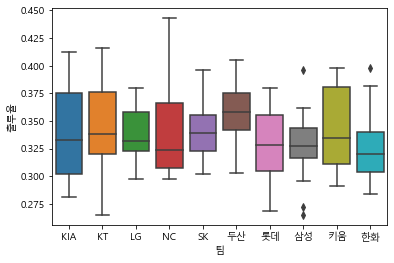

In [17]:
# 팀별 출루율 분포를 boxplot사용해서 보기

import seaborn as sns

sns.boxplot(data = player_stat, x = '팀', y = '출루율')

In [18]:
# 위에서 한글이 깨지기 때문에 깨지지 않는 한글 폰트로 만들어 주기(카피해서 쓰기)

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import platform
import seaborn as sns

if platform.system() == 'Windows' :   #윈도우라면 맑은고딕
    font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:   # mac 이라면
    rc('font', family='AppleGothic')

# 그래프에서 마이너스 기호가 표시 되도록 하는 기호
matplotlib.rcParams['axes.unicode_minus'] = False

<AxesSubplot:xlabel='팀', ylabel='출루율'>

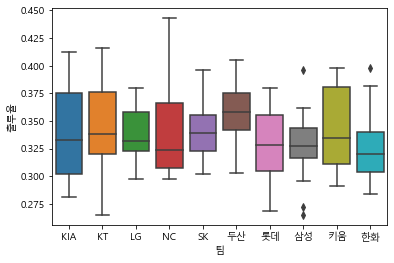

In [19]:
sns.boxplot(data = player_stat, x = '팀', y = '출루율')

<AxesSubplot:xlabel='팀', ylabel='출루율'>

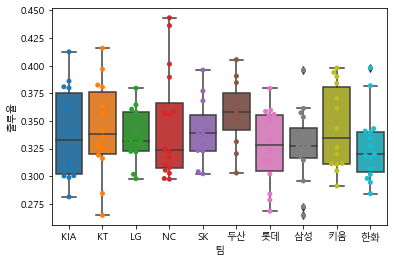

In [20]:
# 팀별 선수 출루율 swarmplot, boxplot을 이용해 살피기

sns.boxplot(data = player_stat, x = '팀', y = '출루율')
sns.swarmplot(data = player_stat, x = '팀', y = '출루율')  # 분포도 볼 수 있음

<AxesSubplot:xlabel='팀', ylabel='출루율'>

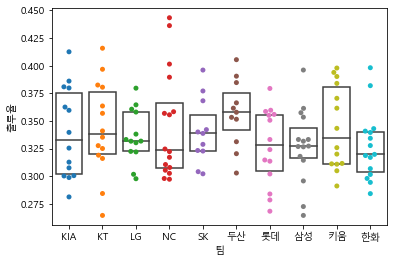

In [28]:
# swarmplot과 boxplot을 함꼐 사용할 경우 색상이 겹쳐 시각적 구분이 힘듦
# 그릴 때에는 박스플랏 색을 제거하면 깔끔함
# showcaps=False                 박스상단 가로라인 치우기
# whiskerprops={'linewidth':0}    박스 세로라인 숨기기
# showfliers=False               박스 범위 벗어난 이상치 숨기기
# boxprops={'facecolor':'None'}   박스색 치우기



sns.swarmplot(data = player_stat, x='팀',y='출루율')
sns.boxplot(data=player_stat, x='팀', y='출루율',
           showcaps=False,
           whiskerprops={'linewidth':0},
           showfliers=False,
           boxprops={'facecolor':'None'} )

In [31]:
# 타자별 2019년 기록 데이터를 저장하기
# 엑셀로 저장 하기
# 인덱스는 빼려면 index=False

file = './data/player_stat.csv'
player_stat.to_csv(file, encoding='cp949',index=False)